In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
img2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

In [4]:
img4=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

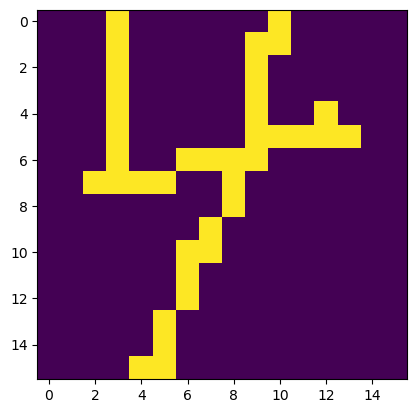

In [5]:
img = np.reshape(img4,(16,16),order='F')
plt.imshow(img)

In [6]:
file1 = pd.read_csv("trainX.txt", sep = ' ', header = None)
file1 = file1.dropna(axis = 1)
train_x = np.array(file1)

file2 = pd.read_csv("trainY.txt", sep = ' ', header = None)
file2 = file2.dropna(axis = 1)
train_y = np.array(file2)
#train_y.shape

two_trainX = train_x[:250,:]
four_trainX = train_x[250:,:]

In [7]:
#two_trainX.shape
two_one_prob = (two_trainX.sum(axis = 0)+1)/(two_trainX.shape[0]+2)
two_one_prob = two_one_prob.reshape(1,-1)
#print(two_one_prob)
two_zero_prob = 1 - two_one_prob
two_zero_prob = two_zero_prob.reshape(1,-1)
#print(two_zero_prob)
#two_zero_prob.shape

In [8]:
four_one_prob = (four_trainX.sum(axis = 0)+1)/(four_trainX.shape[0]+2)
four_one_prob = four_one_prob.reshape(1,-1)
#print(four_one_prob)
four_zero_prob = 1 - four_one_prob
four_zero_prob = four_zero_prob.reshape(1,-1)
#print(four_zero_prob)

In [9]:
four_one_prob.shape

(1, 256)

In [10]:
prob_ones_class2 = np.log(two_one_prob)
prob_zeros_class2 = np.log(two_zero_prob)
prob_ones_class4 = np.log(four_one_prob)
prob_zeros_class4 = np.log(four_zero_prob)
prob_zeros_class2.shape
#prob_zeros_class4[0][1]


(1, 256)

In [11]:
#predictions for class 2 in x_train
prediction_trainX_class2 = list()
for x in range(train_x.shape[0]):
    result = 0.0
    for y in range(train_x.shape[1]):
        if(train_x[x][y] == 1):
            result = result + prob_ones_class2[0][y]
        elif(train_x[x][y] == 0):
            result = result + prob_zeros_class2[0][y]
    prediction_trainX_class2.append(result*0.5)

#predictions for class 4 in x_train
prediction_trainX_class4 = list()
for x in range(train_x.shape[0]):
    result = 0.0
    for y in range(train_x.shape[1]):
        if(train_x[x][y] == 1):
            result = result + prob_ones_class4[0][y]
        elif(train_x[x][y] == 0):
            result = result + prob_zeros_class4[0][y]
    prediction_trainX_class4.append(result*0.5)


#Accuracy of train_x predictions

predictions_train = list()
for x in range (train_y.shape[0]):
    for y in range (train_y.shape[1]):
        if(prediction_trainX_class2[x] > prediction_trainX_class4[x]):
            predictions_train.append(2)
        else:
            predictions_train.append(4)

#print("Predictions: ")
#print(predictions_train)
#print("Actual values: ")
#print(train_y)


accurate = 0
for i in range(train_y.shape[0]):
    if(int(predictions_train[i]) == train_y[i]):
        accurate = accurate + 1

a = (accurate / 500) * 100
print("\nAccuracy of Training Data: ", a, "%")


Accuracy of Training Data:  98.8 %


In [12]:
file3 = pd.read_csv("testX.txt", sep = ' ', header = None)
file3 = file3.dropna(axis = 1)
test_x = np.array(file3)

file4 = pd.read_csv("testY.txt", sep = ' ', header = None)
file4 = file4.dropna(axis = 1)
test_y = np.array(file4)


two_testX = test_x[:50,:]
four_testX = test_x[50:,:]

#two_trainX.shape
two_one_prob = (two_testX.sum(axis = 0)+1)/(two_testX.shape[0]+2)
two_one_prob = two_one_prob.reshape(1,-1)
#print(two_one_prob)
two_zero_prob = 1 - two_one_prob
two_zero_prob = two_zero_prob.reshape(1,-1)
#print(two_zero_prob)

four_one_prob = (four_testX.sum(axis = 0)+1)/(four_testX.shape[0]+2)
four_one_prob = four_one_prob.reshape(1,-1)
#print(four_one_prob)
four_zero_prob = 1 - four_one_prob
four_zero_prob = four_zero_prob.reshape(1,-1)
#print(four_zero_prob)

prob_ones_class2 = np.log(two_one_prob)
prob_zeros_class2 = np.log(two_zero_prob)
prob_ones_class4 = np.log(four_one_prob)
prob_zeros_class4 = np.log(four_zero_prob)
#prob_zeros_class2.shape
test_x.shape

(100, 256)

In [13]:

#predictions for class 2 in test_x
prediction_testX_class2 = list()
for x in range(test_x.shape[0]):
    result = 0.0
    for y in range(test_x.shape[1]):
        if(test_x[x][y] == 1):
            result = result + prob_ones_class2[0][y]
        elif(test_x[x][y] == 0):
            result = result + prob_zeros_class2[0][y]
    prediction_testX_class2.append(result*0.5)

#predictions for class 4 in test_x
prediction_testX_class4 = list()
for x in range(test_x.shape[0]):
    result = 0.0
    for y in range(test_x.shape[1]):
        if(test_x[x][y] == 1):
            result = result + prob_ones_class4[0][y]
        elif(test_x[x][y] == 0):
            result = result + prob_zeros_class4[0][y]
    prediction_testX_class4.append(result*0.5)


#Accuracy of train_x predictions

predictions_test = list()
for x in range (test_y.shape[0]):
    for y in range (test_y.shape[1]):
        if(prediction_testX_class2[x] > prediction_testX_class4[x]):
            predictions_test.append(2)
        else:
            predictions_test.append(4)

#print("Predictions: ")
#print(predictions_train)
#print("Actual values: ")
#print(train_y)

from sklearn.metrics import confusion_matrix,classification_report
len(test_y)
classification_report(test_y,predictions_test)

accurate = 0
for i in range(test_y.shape[0]):
    if(int(predictions_test[i]) == test_y[i]):
        accurate = accurate + 1
        
b = (accurate / 100) * 100
print("Accuracy of Testing Data: ", b, "%")

Accuracy of Testing Data:  100.0 %


In [14]:
print("The overall accuracy of the system is: ", ((a + b) / 2),"%")

The overall accuracy of the system is:  99.4 %
